/tmp/ipykernel_762637/1228568103.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(columns=["track_id", "artists", "album_name", "track_name", "track_genre"], inplace=True)


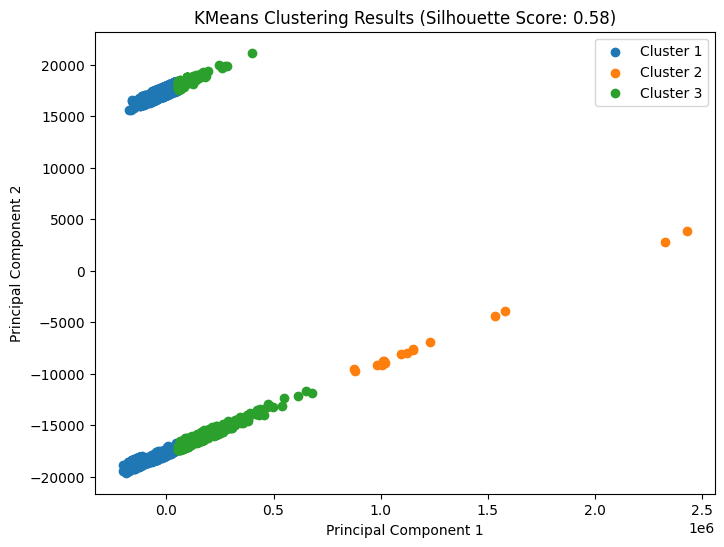

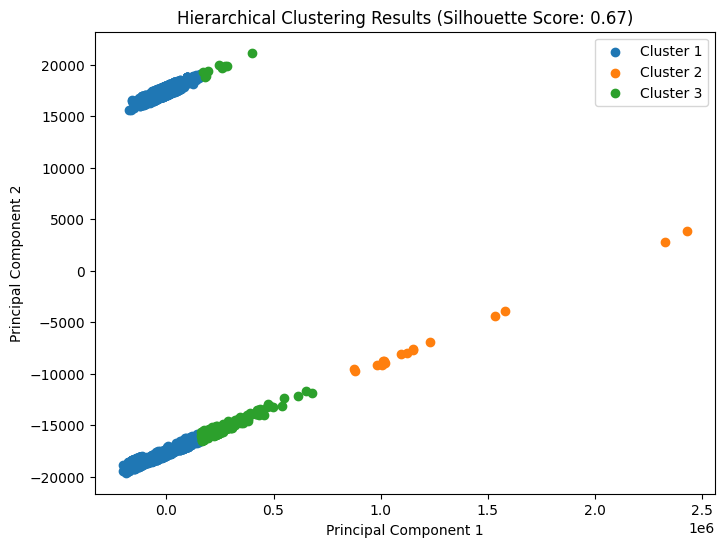

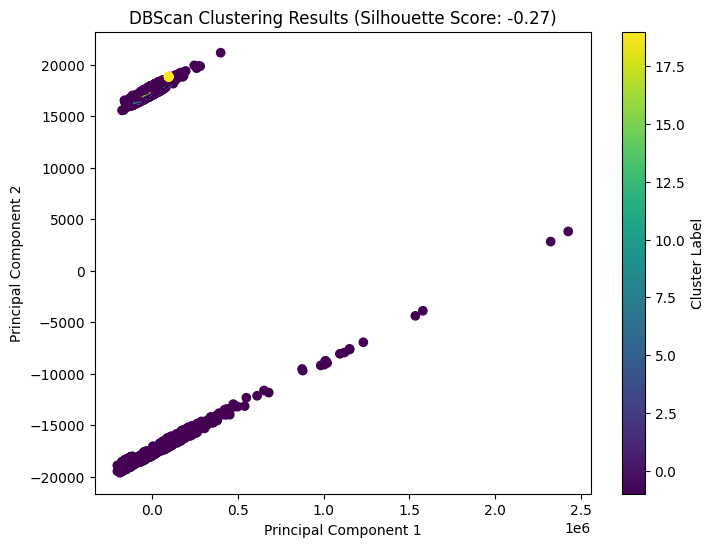

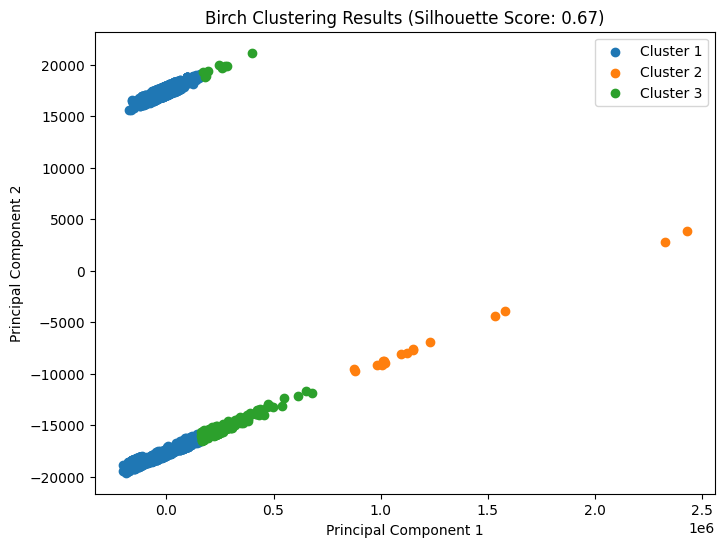

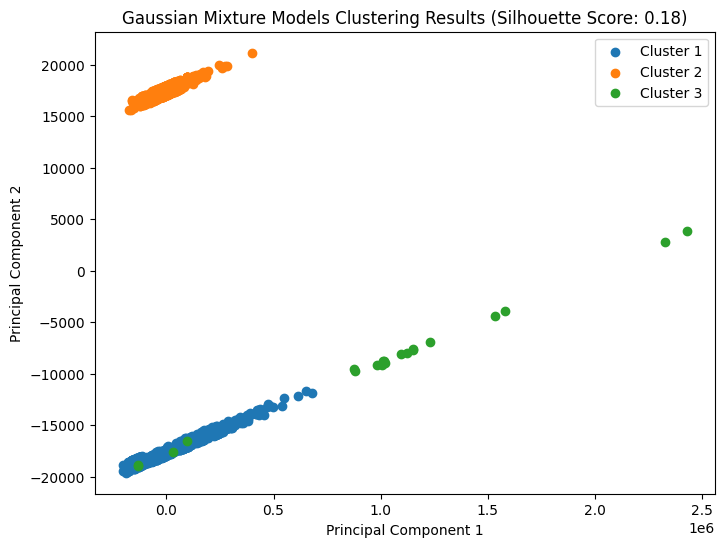

Best clustering method: Hierarchical with parameters linkage=ward_n_clusters=3
Silhouette score: 0.6705126828910458
Best Clustering Result:
         Method                 Parameters  Silhouette Score  \
0  Hierarchical  linkage=ward_n_clusters=3          0.670513   

                                   Model  
0  AgglomerativeClustering(n_clusters=3)  


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

data = pd.read_csv("dataset.csv")

chosen_genres = ["hip-hop", "Rock", "classical"]
filtered_data = data[data['track_genre'].isin(chosen_genres)]

# Drop unnecessary columns
filtered_data.drop(columns=["track_id", "artists", "album_name", "track_name", "track_genre"], inplace=True)

# Preprocessing
scaler = StandardScaler()
scaled_data=filtered_data
scaled_data2 = scaler.fit_transform(filtered_data)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

best_cluster_results = []

kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
best_cluster_results.append(("KMeans", "n_clusters=3", silhouette_avg, kmeans))

plt.figure(figsize=(8, 6))
for i in range(kmeans.n_clusters):
    plt.scatter(pca_data[cluster_labels == i, 0], pca_data[cluster_labels == i, 1], label=f'Cluster {i+1}')
plt.title(f'KMeans Clustering Results (Silhouette Score: {silhouette_avg:.2f})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

hier_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_labels = hier_clustering.fit_predict(scaled_data)
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
best_cluster_results.append(("Hierarchical", "linkage=ward_n_clusters=3", silhouette_avg, hier_clustering))

plt.figure(figsize=(8, 6))
for i in range(hier_clustering.n_clusters):
    plt.scatter(pca_data[cluster_labels == i, 0], pca_data[cluster_labels == i, 1], label=f'Cluster {i+1}')
plt.title(f'Hierarchical Clustering Results (Silhouette Score: {silhouette_avg:.2f})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

dbscan = DBSCAN()
cluster_labels = dbscan.fit_predict(scaled_data2)
silhouette_avg = silhouette_score(scaled_data2, cluster_labels)
best_cluster_results.append(("DBScan", "default", silhouette_avg, dbscan))

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title(f'DBScan Clustering Results (Silhouette Score: {silhouette_avg:.2f})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

birch = Birch(n_clusters=3)
cluster_labels = birch.fit_predict(scaled_data)
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
best_cluster_results.append(("Birch", "n_clusters=3", silhouette_avg, birch))

plt.figure(figsize=(8, 6))
for i in range(len(set(cluster_labels))):
    plt.scatter(pca_data[cluster_labels == i, 0], pca_data[cluster_labels == i, 1], label=f'Cluster {i+1}')
plt.title(f'Birch Clustering Results (Silhouette Score: {silhouette_avg:.2f})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


covariance_type=['full', 'tied', 'diag', 'spherical']
# for covariance_type1 in covariance_type: 
gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(scaled_data)
cluster_labels = gmm.predict(scaled_data)
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
best_cluster_results.append(("GMM", "covariance_type=full_n_components=3", silhouette_avg, gmm))

# plotting clusters using PCA for GMM
plt.figure(figsize=(8, 6))
for i in range(gmm.n_components):
    plt.scatter(pca_data[cluster_labels == i, 0], pca_data[cluster_labels == i, 1], label=f'Cluster {i+1}')
plt.title(f'Gaussian Mixture Models Clustering Results (Silhouette Score: {silhouette_avg:.2f})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# find the best clustering result based on silhouette score
best_cluster_result = max(best_cluster_results, key=lambda x: x[2])

# Print the best clustering method and its silhouette score
print(f"Best clustering method: {best_cluster_result[0]} with parameters {best_cluster_result[1]}")
print(f"Silhouette score: {best_cluster_result[2]}")

# store the best result in a dataframe
columns = ['Method', 'Parameters', 'Silhouette Score', 'Model']
best_result_df = pd.DataFrame([best_cluster_result], columns=columns)

print("Best Clustering Result:")
print(best_result_df)


#Birch needs to try differnt thresholds and branching_factors 

#GaussianMixture needs to try differnt covariance_type

#DBscan needs to try differnt eps, min_samples, not workign well as it is. 

#Hierarchal needs to check differnt linkage methods: linkage{‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’

# Kmeans needs to try differnt init, init{‘k-means++’, ‘random’}, callable or array-like of shape (n_clusters, n_features), default=’k-means++’

#Wait for the code i have that works well 


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

data = pd.read_csv("dataset.csv")

chosen_genres = ["hip-hop", "Rock", "classical"]
filtered_data = data[data['track_genre'].isin(chosen_genres)]

# Drop unnecessary columns
filtered_data.drop(columns=["track_id", "artists", "album_name", "track_name", "track_genre"], inplace=True)

# Preprocessing
scaler = StandardScaler()
scaled_data=filtered_data
scaled_data2 = scaler.fit_transform(filtered_data)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

best_cluster_results = []

kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
best_cluster_results.append(("KMeans", "n_clusters=3", silhouette_avg, kmeans))

linkage_methods = ['ward', 'complete', 'average', 'single']
for linkage_method in linkage_methods:
    hier_clustering = AgglomerativeClustering(n_clusters=3, linkage=linkage_method)
    cluster_labels = hier_clustering.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    best_cluster_results.append(("Hierarchical", f"linkage={linkage_method}_n_clusters=3", silhouette_avg, hier_clustering))


eps_values = [0.1, 0.5, 1.0]
min_samples_values = [2, 5, 10]
for eps_val in eps_values:
    for min_samples_val in min_samples_values:
        dbscan = DBSCAN(eps=eps_val, min_samples=min_samples_val)
        cluster_labels = dbscan.fit_predict(scaled_data2)
        if len(set(cluster_labels)) > 1:
            silhouette_avg = silhouette_score(scaled_data2, cluster_labels)
            best_cluster_results.append(("DBScan", f"eps={eps_val}_min_samples={min_samples_val}", silhouette_avg, dbscan))

thresholds = [0.1, 0.5, 1.0]
branching_factors = [20, 50, 100]
for threshold_val in thresholds:
    for branching_factor_val in branching_factors:
        birch = Birch(n_clusters=3, threshold=threshold_val, branching_factor=branching_factor_val)
        cluster_labels = birch.fit_predict(scaled_data)
        silhouette_avg = silhouette_score(scaled_data, cluster_labels)
        best_cluster_results.append(("Birch", f"n_clusters=3
        _threshold={threshold_val}_branching_factor={branching_factor_val}", silhouette_avg, birch))

covariance_types = ['full', 'tied', 'diag', 'spherical']


for covariance_type_val in covariance_types:
    gmm = GaussianMixture(n_components=3, covariance_type=covariance_type_val)
    gmm.fit(scaled_data)
    cluster_labels = gmm.predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    best_cluster_results.append(("GMM", f"covariance_type={covariance_type_val}_n_components=3", silhouette_avg, gmm))

for method in set(result[0] for result in best_cluster_results):
    best_result = max((result for result in best_cluster_results if result[0] == method), key=lambda x: x[2])
    best_model = best_result[3]
    cluster_labels = best_model.fit_predict(scaled_data)

    plt.figure(figsize=(8, 6))
    if isinstance(best_model, KMeans):
        for i in range(best_model.n_clusters):
            plt.scatter(pca_data[cluster_labels == i, 0], pca_data[cluster_labels == i, 1], label=f'Cluster {i+1}')
        plt.title(f'Best {method} Clustering Results (Silhouette Score: {best_result[2]:.2f})')
    elif isinstance(best_model, AgglomerativeClustering):
        for i in range(best_model.n_clusters):
            plt.scatter(pca_data[cluster_labels == i, 0], pca_data[cluster_labels == i, 1], label=f'Cluster {i+1}')
        plt.title(f'Best {method} Clustering Results (Silhouette Score: {best_result[2]:.2f})')
    elif isinstance(best_model, DBSCAN):
        plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis')
        plt.colorbar(label='Cluster Label')
        plt.title(f'Best {method} Clustering Results (Silhouette Score: {best_result[2]:.2f})')
    elif isinstance(best_model, Birch):
        for i in range(len(set(cluster_labels))):
            plt.scatter(pca_data[cluster_labels == i, 0], pca_data[cluster_labels == i, 1], label=f'Cluster {i+1}')
        plt.title(f'Best {method} Clustering Results (Silhouette Score: {best_result[2]:.2f})')
    elif isinstance(best_model, GaussianMixture):
        for i in range(best_model.n_components):
            plt.scatter(pca_data[cluster_labels == i, 0], pca_data[cluster_labels == i, 1], label=f'Cluster {i+1}')
        plt.title(f'Best {method} Clustering Results (Silhouette Score: {best_result[2]:.2f})')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

overall_best_result = max(best_cluster_results, key=lambda x: x[2])

print(f"Overall best clustering method: {overall_best_result[0]} with parameters {overall_best_result[1]}")
print(f"Overall best silhouette score: {overall_best_result[2]}")

columns = ['Method', 'Parameters', 'Silhouette Score', 'Model']
overall_best_result_df = pd.DataFrame([overall_best_result], columns=columns)

print("Overall Best Clustering Result:")
print(overall_best_result_df)


SyntaxError: unterminated string literal (detected at line 57) (313967785.py, line 57)